# Bell State: Entangling Photons
![Two photons being entangled](../assets/entagled-photons.png)
This is a screenshot of [a video](https://www.youtube.com/watch?v=wGkx1MUw2TU&t=95s) where two photons are entangled. When two particles are entangled, no matter how far apart they are, when the state of one changes it affects the other one. In simple terms, imagine you have two footballs, one on the east coast in New York and the other one in San Francisco. When you rotate the ball in NY, the ball in SF rotates as well.

This is a highly exaggerated example, but on quantum scales, that's basically what is happening. Now lets build a circuit that simulates entanglement. This simple circuit is called Bell State and is one of four types of Bell states we can implement. This is the "Hello World" of quantum computing.

## Step 1: Creating a circuit

In [52]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import SamplerV2 as Sampler

# First we need to initialize a circuit
qc = QuantumCircuit(2)

# Now we can visualize this by simply printing the circuit to the std output
print(qc)

     
q_0: 
     
q_1: 
     


In [53]:
#or you can do this 
print(qc.draw())

     
q_0: 
     
q_1: 
     


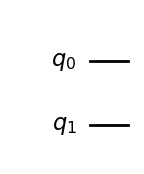

In [54]:
# or if you want some fancy circuits, we can use the matplotlib integration to draw the circuit
qc.draw(output="mpl")

<div class="alert alert-warning">

<b>Note:</b> You'll need to install `matplotlib` and `pylatexenc` for the last visualization method to work.
</div>


## Step 2: Superposition

Photons/electrons/qubits in superposition are in an unknown state and they remains unknown until they're measured. There's a wonderful [video](https://www.youtube.com/watch?v=lZ3bPUKo5zc) from MIT that goes into what superposition is exactly, so here we'll only go through using it in practice.

A Hadamard (H) gate can put a qubit in superposition. We can apply an H gate to our circuit like this.

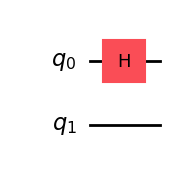

In [55]:
# You can provide the number of the qubit that you want the H gate on
qc.h(0)
qc.draw(output="mpl")

Now you might be wondering "why we need to put a qubit in superposition?". Well by default a qubit is in state |0⟩ [(ket 0)](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems). In simple terms, it means that the qubit is already in a state that we can determinate, which is 0. However, a real qubit, which is made up of a photon/particle, is always in superposition which is an indeterminate state until measured. Measuring a qubit simply means observing it and recording its state. So to simulate that, we use a H gate on q0.

With Qiskit 1.0, we can use a builtin sampler, which is a fancy word for "a function that takes a circuit and calculates its state", called `SamplerV2`. We will get into more details about using the samplers and estimators in the future, but for now the above description should be enough.

In [56]:
# we measure all the qubits
qc.measure_all()
# then run the circuit through a sampler and allow the simulator to do all the calculation
sampler = Sampler()
job = sampler.run([qc])
# read the result of the calculations
result = job.result()
# read the measurement data
count = result[0].data.meas.get_counts()

print(count)

{'00': 499, '01': 525}


After you run the above cell, you'll get a result that looks like `{'00': 534, '01': 490}`. However, the values in this dictionary will be different each time. So, how do we interpret this result?

The keys have the length that's is equal to the number of qubits you set on your circuit. <b>In this case we set it to 2, and therefore we have leys of length 2 in the result</b>. The order of the keys goes from left to right representing last qubit to first qubit respectively.

It's important to remember that "results" in a quantum circuit are probability distributions. Our sampler by default "runs" our circuit 1024 times (shots) and the results here indicate that out of all the shots, `00` for about 534 times and `01` for 490 times, which means our q0 is roughly in a 50/50 state of 0 or 1. Hurray! we just learned what the H gate did for us.

## Step 3: Entanglement

If you've been looking at anything quantum related, you've probably already heard what "entanglement". In fact, we started this notebook talking about it. So, you might be wondering how we can achieve that in Qiskit. 

On a `QuantumCircuit` in Qiskit, we can apply a "controlled-not", also called "cnot" or in code `cx` operator to entangle a "control qubit" to a "target qubit". Here's how it's done:

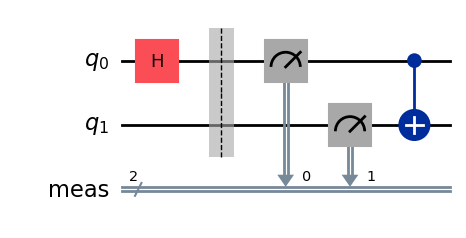

In [57]:
# call the .cx() method on our circuit
qc.cx(0,1)

qc.draw(output="mpl")


You can see that the last operator is a cnot operator, connection our control qubit(q0) to the target qubit(q1). Now we can know for sure that when the state of q0 changes, it will change the state of q1. So, in short our circuit can be designed like the following:

In [58]:
new_qc = QuantumCircuit(2)
new_qc.h(0)
new_qc.cx(0,1)

Now, let's measure the new circuit.

In [59]:
# we measure all the qubits
new_qc.measure_all()
# then run the circuit through a sampler and allow the simulator to do all the calculation
sampler = Sampler()
job = sampler.run([new_qc])
# read the result of the calculations
result = job.result()
# read the measurement data
count = result[0].data.meas.get_counts()

print(count)

{'11': 500, '00': 524}


From this result, we can infer that our q1 is now roughly in a 50/50 probability of being 0 or 1. Entanglement accomplished!

In future learnings, we'll see how Bell State can be used in different scenarios. Hopefully this gave you a glimpse into the fascinating world of all things Quantum.